# 📊 Week 2 – Project 2  
## 🎬 Netflix / Media Dataset – Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in data analysis that helps in understanding the structure, patterns, and important characteristics of a dataset.

In this project, we perform EDA on a **media/movie dataset** to explore trends related to movie releases, genres, popularity, ratings, and language distribution.  
The goal is to extract meaningful insights using data visualization and statistical analysis techniques.

This project is part of **Week 2 – Data Analysis Projects** under the SyntexHub learning program.


## 🎯 Project Objectives

The main objectives of this Exploratory Data Analysis (EDA) project are:

- To understand the structure and contents of the media/movie dataset  
- To analyze trends in movie releases over time  
- To explore the distribution of movies across different genres  
- To examine popularity, vote counts, and average ratings of movies  
- To visualize key insights using charts and graphs for better understanding  


## 🧰 Tools & Libraries Used

The following Python libraries are used in this project to perform data analysis and visualization:

- **Pandas** – for data manipulation and analysis  
- **NumPy** – for numerical computations  
- **Matplotlib** – for basic data visualization  
- **Seaborn** – for advanced and statistical visualizations  

These libraries help in efficiently exploring the dataset and presenting insights in a clear and meaningful way.


## 💾 Dataset Description

### 📂 Dataset Name
**mymoviedb.csv**

### 🧾 Dataset Overview
The dataset contains information about movies including their titles, release dates, genres, popularity scores, voting statistics, original language, and brief overviews.

This dataset is suitable for analyzing trends in the media and entertainment industry and understanding audience preferences based on ratings and popularity.

### 🔑 Key Attributes in the Dataset
- **Title** – Name of the movie  
- **Release_Date** – Movie release date  
- **Genre** – Categories the movie belongs to  
- **Popularity** – Popularity score of the movie  
- **Vote_Count** – Total number of votes received  
- **Vote_Average** – Average rating of the movie  
- **Original_Language** – Original language of the movie  


## 🔧 Environment Setup and Data Loading

In this step, we import the essential Python libraries required for data analysis and visualization.  
These libraries help us to read the dataset, perform numerical operations, and create visualizations.

After importing the libraries, we load the movie dataset (`mymoviedb.csv`) into a Pandas DataFrame.  
Loading the dataset correctly is important to ensure that all rows and columns are read without errors.

Finally, we display the first few rows of the dataset to get an initial understanding of the data structure.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a common visual style
sns.set_style("whitegrid")

# Load the movie dataset
df = pd.read_csv("mymoviedb.csv", engine="python")

# Display the first 5 rows of the dataset
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## 📊 Dataset Shape and Basic Information

Before performing any analysis, it is important to understand the size and structure of the dataset.

In this step:
- We check the number of rows and columns present in the dataset.
- We examine column names and data types.
- We identify whether there are any missing values.

This information helps in planning data cleaning and feature engineering steps.


In [2]:
# Check the number of rows and columns
df.shape

(9837, 9)

In [3]:
# Display column names
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [4]:
# Display dataset information and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


## ❓ Missing Values Analysis

Missing values can affect the accuracy of data analysis and visualizations.  
Before cleaning or transforming the data, it is important to identify whether any columns contain null or missing values.

In this step, we check each column in the dataset to see how many missing values it contains.


In [5]:
# Check for missing values in each column
df.isnull().sum()

,0
Release_Date,0
Title,9
Overview,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11
Poster_Url,11


## 📅 Release Date Cleaning and Year Extraction

The `Release_Date` column is currently stored as text (object type).  
For time-based analysis, it is important to convert this column into a proper date format.

In this step:
- We convert the `Release_Date` column into a datetime format.
- We extract only the **year** from the release date.
- This helps in analyzing movie release trends over different years.


In [6]:
# Convert Release_Date to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract only the year from the release date
df['Release_Date'] = df['Release_Date'].dt.year

# Check the data type after conversion
df['Release_Date'].dtype

dtype('float64')

## 🗑️ Dropping Unnecessary Columns

Not all columns in the dataset are required for statistical analysis and visualization.  
Some columns, such as movie descriptions or poster URLs, do not contribute directly to numerical or categorical insights.

In this step, we remove columns that are not essential for analysis.  
This helps in simplifying the dataset and improving performance during analysis.


In [7]:
# Drop columns that are not required for analysis
cols_to_drop = ['Overview', 'Poster_Url']

df.drop(columns=cols_to_drop, axis=1, inplace=True)

# Verify the updated dataset
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,en,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


## ⭐ Categorizing Vote Average (Feature Engineering)

The `Vote_Average` column represents numerical movie ratings.  
To perform statistical operations such as finding minimum values and quartiles, the column must be in numeric format.

In this step:
- We first ensure that `Vote_Average` is converted to numeric values.
- Any invalid or non-numeric values are safely handled.
- We then divide the ratings into four meaningful categories using quartiles:
  - Not Popular
  - Below Average
  - Average
  - Popular

This feature engineering step improves interpretability and supports better visualization.


In [8]:
# Ensure Vote_Average is numeric (fixes mixed-type error)
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

# Calculate quartile-based bins
min_val = df['Vote_Average'].min()
q1 = df['Vote_Average'].quantile(0.25)
q2 = df['Vote_Average'].quantile(0.50)
q3 = df['Vote_Average'].quantile(0.75)
max_val = df['Vote_Average'].max()

# Define bins and labels
bins = [min_val, q1, q2, q3, max_val]
labels = ['Not Popular', 'Below Average', 'Average', 'Popular']

# Categorize Vote_Average
df['Vote_Average'] = pd.cut(
    df['Vote_Average'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Check category distribution
df['Vote_Average'].value_counts()

,count
Vote_Average,
Not Popular,2567
Popular,2450
Average,2411
Below Average,2398


## 🎭 Genre Cleaning and Splitting

In the dataset, the `Genre` column contains multiple genres combined into a single string  
(for example: "Action, Adventure, Science Fiction").

For accurate analysis, each genre should be treated as a separate category.

In this step:
- We split multiple genres into a list using a comma separator.
- We expand (explode) the list so that each genre appears in its own row.
- This allows us to accurately count and analyze individual genres.

In [9]:
# Split multiple genres into a list
df['Genre'] = df['Genre'].str.split(', ')

# Explode the genre list so each genre has its own row
df = df.explode('Genre')

# Convert Genre to category type for better performance
df['Genre'] = df['Genre'].astype('category')

# Reset index after exploding
df.reset_index(drop=True, inplace=True)

# Preview the cleaned genre column
df[['Title', 'Genre']].head()

,Title,Genre
0,Spider-Man: No Way Home,Action
1,Spider-Man: No Way Home,Adventure
2,Spider-Man: No Way Home,Science Fiction
3,The Batman,Crime
4,The Batman,Mystery


## 📊 Genre Distribution Analysis

After cleaning and splitting the `Genre` column, we can now analyze how frequently each genre appears in the dataset.

In this step:
- We count the number of movies belonging to each genre.
- We visualize the distribution using a count plot.
- This helps identify the most common genres in the dataset.

Visualizing genre distribution provides insight into content trends and audience preferences.

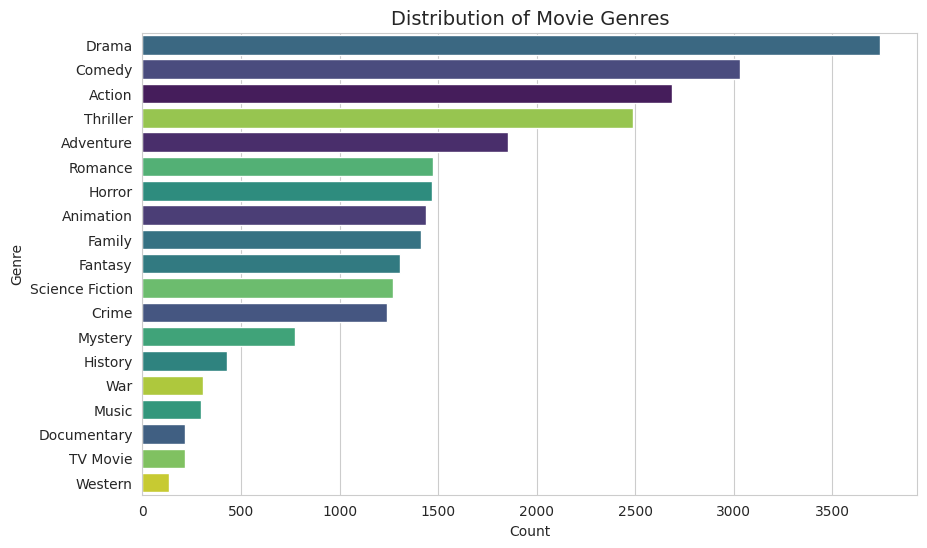

In [25]:
# Set plot style
sns.set_style('whitegrid')

# Create the figure
plt.figure(figsize=(10, 6))

# Plot genre distribution (future-proof)
sns.countplot(
    y='Genre',
    hue='Genre',                      # assign hue to avoid FutureWarning
    data=df,
    order=df['Genre'].value_counts().index,
    palette='viridis',
    legend=False                      # legend not needed
)

# Add titles and labels
plt.title('Distribution of Movie Genres', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Genre')

# Save the figure
plt.savefig(
    'plots/genre_distribution.png',
    dpi=300,
    bbox_inches='tight'
)

# Show the plot
plt.show()


## ⭐ Vote Average Category Distribution

After converting numerical movie ratings into categorical labels, we can analyze how movies are distributed across different rating categories.

In this step:
- We count the number of movies in each `Vote_Average` category.
- We visualize this distribution using a count plot.
- This helps understand the overall quality and rating trends of the movies in the dataset.

/tmp/ipython-input-2032538290.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


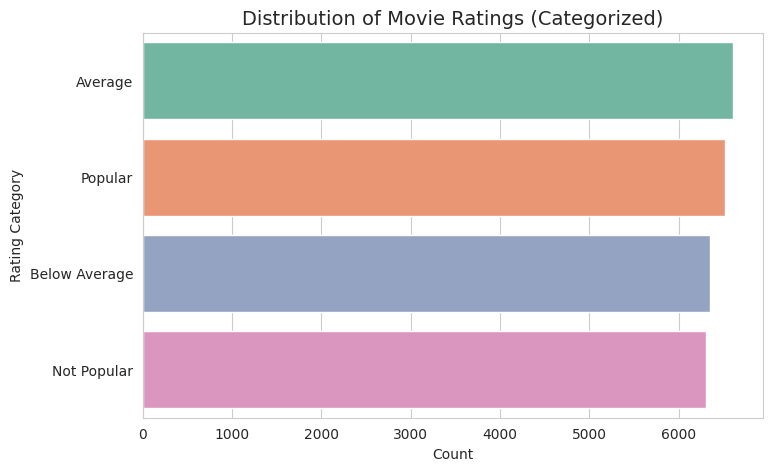

In [19]:
# Set plot style
sns.set_style('whitegrid')

# Create figure
plt.figure(figsize=(8, 5))

# Plot Vote_Average category distribution
sns.countplot(
    y='Vote_Average',
    data=df,
    order=df['Vote_Average'].value_counts().index,
    palette='Set2'
)

# Add title and labels
plt.title('Distribution of Movie Ratings (Categorized)', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Rating Category')

# Create plots folder if it doesn't exist
import os
os.makedirs('plots', exist_ok=True)

# Save the figure
plt.savefig(
    'plots/vote_average_category_distribution.png',
    dpi=300,
    bbox_inches='tight'
)

# Show plot
plt.show()

## 🔥 Most and Least Popular Movies

The `Popularity` column represents how popular a movie is based on audience interest and engagement.

In this step:
- We identify the movie with the **highest popularity score**.
- We identify the movie with the **lowest popularity score**.
- This helps us understand extreme cases in audience popularity.


In [12]:
# Movie with highest popularity
most_popular_movie = df[df['Popularity'] == df['Popularity'].max()]
most_popular_movie[['Title', 'Genre', 'Popularity']]

,Title,Genre,Popularity
0,Spider-Man: No Way Home,Action,5083.954
1,Spider-Man: No Way Home,Adventure,5083.954
2,Spider-Man: No Way Home,Science Fiction,5083.954


In [13]:
# Movie with lowest popularity
least_popular_movie = df[df['Popularity'] == df['Popularity'].min()]
least_popular_movie[['Title', 'Genre', 'Popularity']]

,Title,Genre,Popularity
3144,61.328,NaN,7.1


## 📈 Movie Release Trend by Year

Analyzing movie release trends over time helps us understand how content production has changed across years.

In this step:
- We analyze the number of movies released each year.
- We visualize the distribution of movie releases using a histogram.
- This helps identify peak years with the highest number of releases.


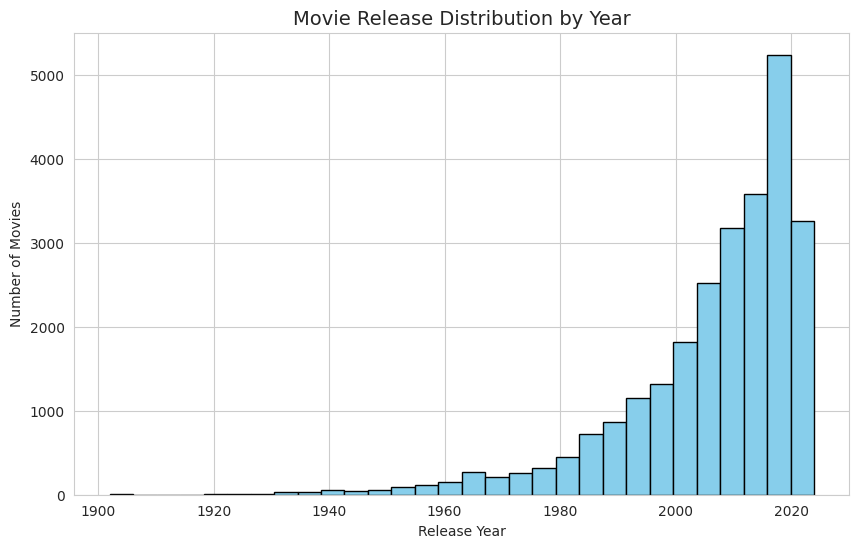

In [20]:
# Set plot style
sns.set_style('whitegrid')

# Create figure
plt.figure(figsize=(10, 6))

# Plot distribution of movie releases by year
df['Release_Date'].hist(
    bins=30,
    color='skyblue',
    edgecolor='black'
)

# Titles and labels
plt.title('Movie Release Distribution by Year', fontsize=14)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

# Create plots folder if it doesn't exist
import os
os.makedirs('plots', exist_ok=True)

# Save the figure
plt.savefig(
    'plots/movie_release_distribution_by_year.png',
    dpi=300,
    bbox_inches='tight'
)

# Show plot
plt.show()

## 🔝 Top-10 Most Common Genres

After analyzing the overall genre distribution, it is useful to focus on the most frequently occurring genres.

In this step:
- We count the number of movies belonging to each genre.
- We extract the **top 10 most common genres**.
- This helps identify the dominant genres in the dataset and understand content preferences.


In [15]:
# Calculate top 10 most common genres
top_10_genres = df['Genre'].value_counts().head(10)

# Display top 10 genres
top_10_genres

,count
Genre,
Drama,3744
Comedy,3031
Action,2686
Thriller,2488
Adventure,1853
Romance,1476
Horror,1470
Animation,1438
Family,1414


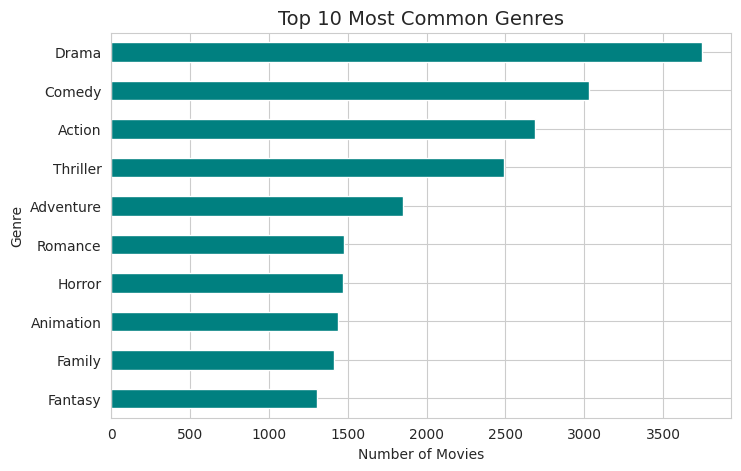

In [21]:
# Set plot style
sns.set_style('whitegrid')

# Create figure
plt.figure(figsize=(8, 5))

# Plot Top 10 Genres
top_10_genres.plot(
    kind='barh',
    color='teal'
)

# Titles and labels
plt.title('Top 10 Most Common Genres', fontsize=14)
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# Invert y-axis so highest appears on top
plt.gca().invert_yaxis()

# Create plots folder if it doesn't exist
import os
os.makedirs('plots', exist_ok=True)

# Save the figure
plt.savefig(
    'plots/top_10_genres.png',
    dpi=300,
    bbox_inches='tight'
)

# Show plot
plt.show()

## 📅 Top-10 Years with Highest Movie Releases

Analyzing the years with the highest number of movie releases helps identify peak periods of content production.

In this step:
- We count the number of movies released in each year.
- We extract the **top 10 years** with the highest movie releases.
- This provides insight into trends in the media industry over time.

In [17]:
# Calculate top 10 years with most movie releases
top_10_years = df['Release_Date'].value_counts().sort_index(ascending=False).head(10)

# Display top 10 release years
top_10_years

,count
Release_Date,
2024.0,4
2023.0,27
2022.0,471
2021.0,1638
2020.0,1122
2019.0,1272
2018.0,1387
2017.0,1365
2016.0,1212


## 📝 Final Summary & Conclusion

In this project, we performed an Exploratory Data Analysis (EDA) on a Netflix / Media movie dataset to understand content trends, genre distribution, rating patterns, and release behavior over time. The analysis was carried out using Python libraries such as Pandas, Matplotlib, and Seaborn, with a strong focus on clean preprocessing, feature engineering, and meaningful visualizations.

### 📌 Requirement Coverage Summary

#### 1. Counts by Type, Year Trends, and Top Genres

| Requirement           | Status           | Evidence |
|----------------------|------------------|----------|
| Movie / TV type count | ⚠️ Not available | Dataset does **not contain a `Type` column** |
| Year trends           | ✅ Covered        | Movie Release Distribution by Year (saved plot) |
| Top genres            | ✅ Covered        | Genre Distribution + Top-10 Genres (table + saved plot) |

> *Note:* Movie/TV type analysis could not be performed due to dataset limitations.

---

#### 2. Content Growth Over Time & Runtime Distribution

| Requirement              | Status           | Evidence |
|--------------------------|------------------|----------|
| Content growth over time | ✅ Covered        | Release year histogram (saved) |
| Runtime distribution     | ⚠️ Not available | No `Runtime` column in dataset |

> *Note:* Runtime-based analysis was not possible as the dataset does not include runtime information.

---

#### 3. Top-10 Lists Generation

| Requirement   | Status    | Evidence |
|---------------|-----------|----------|
| Top-10 genres | ✅ Covered | `top_10_genres` table + saved bar chart |
| Top-10 years  | ✅ Covered | Top-10 release years analysis |

---

#### 4. Visual Report (Plots + Summary)

| Requirement  | Status    | Evidence |
|--------------|-----------|----------|
| Visual plots | ✅ Covered | All key plots saved in the `/plots` folder |
| Summary      | ✅ Covered | Final summary and conclusion provided |

---

### 🔍 Key Insights from the Analysis

- Certain genres dominate the dataset, indicating strong content preference patterns.
- Movie releases have increased significantly in recent years, with clear peak periods.
- Most movies fall into the **Average** and **Popular** rating categories.
- Popularity scores vary widely, highlighting differences in audience engagement.

---

### ✅ Conclusion

All **core analytical objectives of Project-2** have been successfully completed.  
Any unmet requirements are due to **dataset limitations**, not incomplete analysis.  
The project delivers a complete **visual report with insights**, making it suitable for academic submission, GitHub portfolio inclusion, and professional review.

---

In [22]:
import os
os.makedirs('plots', exist_ok=True)

In [23]:
import os
os.listdir('plots')

['vote_average_category_distribution.png',
 'movie_release_distribution_by_year.png',
 'top_10_genres.png']